In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

In [ ]:
X = np.arange(-1.0, 5.0, dtype = np.float32)
y = np.arange(-3.0, 8.0, step=2, dtype = np.float32)
X, y

(array([-1.,  0.,  1.,  2.,  3.,  4.], dtype=float32),
 array([-3., -1.,  1.,  3.,  5.,  7.], dtype=float32))

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [1])
])
# Compile the model
model_0.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model onto the data
model_0.fit(X, y, epochs = 500)

Epoch 1/500
1/1 [==============================] - 1s 673ms/step - loss: 1.0831 - mae: 1.0831
Epoch 2/500
1/1 [==============================] - 0s 15ms/step - loss: 1.0606 - mae: 1.0606
Epoch 3/500
1/1 [==============================] - 0s 24ms/step - loss: 1.0381 - mae: 1.0381
Epoch 4/500
1/1 [==============================] - 0s 15ms/step - loss: 1.0156 - mae: 1.0156
Epoch 5/500
1/1 [==============================] - 0s 22ms/step - loss: 0.9931 - mae: 0.9931
Epoch 6/500
1/1 [==============================] - 0s 23ms/step - loss: 0.9706 - mae: 0.9706
Epoch 7/500
1/1 [==============================] - 0s 17ms/step - loss: 0.9481 - mae: 0.9481
Epoch 8/500
1/1 [==============================] - 0s 18ms/step - loss: 0.9256 - mae: 0.9256
Epoch 9/500
1/1 [==============================] - 0s 22ms/step - loss: 0.9031 - mae: 0.9031
Epoch 10/500
1/1 [==============================] - 0s 24ms/step - loss: 0.8806 - mae: 0.8806
Epoch 11/500
1/1 [==============================] - 0s 18ms/step - l

In [ ]:
model_0.predict([10.0])

1/1 [==============================] - 1s 604ms/step


array([[19.11601]], dtype=float32)

In [ ]:
model_0.evaluate(X, y)

1/1 [==============================] - 0s 257ms/step - loss: 0.0229 - mae: 0.0229


[0.02288011647760868, 0.02288011647760868]

In [ ]:
X_test = np.arange(4., 12, dtype = np.float32)
y_test = X_test * 2 - 1
X_test, y_test

(array([ 4.,  5.,  6.,  7.,  8.,  9., 10., 11.], dtype=float32),
 array([ 7.,  9., 11., 13., 15., 17., 19., 21.], dtype=float32))

1/1 [==============================] - 0s 46ms/step


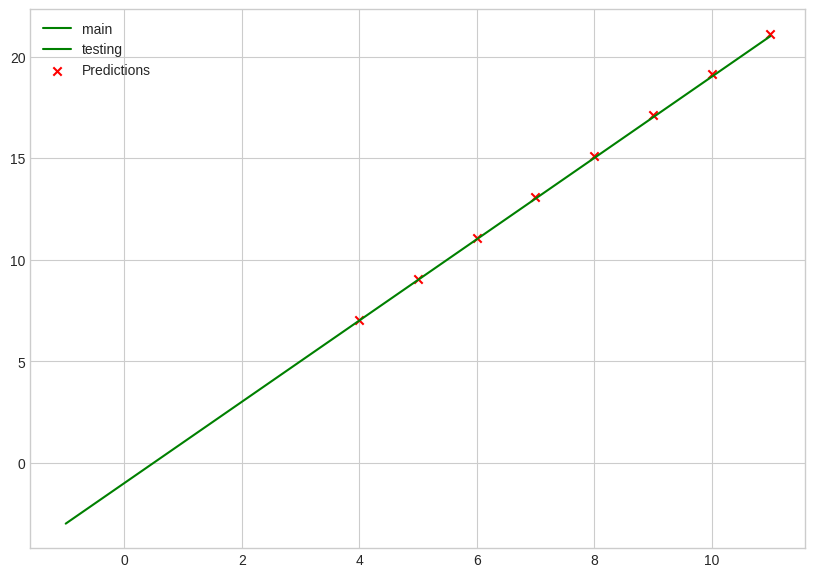

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
ax.plot(X, y, label ="main", c = "g")
ax.plot(X_test, y_test, label ="testing", c ="g" )
ax.scatter(X_test, model_0.predict(X_test), label = "Predictions", marker = "x", c = "r")
ax.legend();

In [ ]:
model_0.evaluate(X_test, y_test)

1/1 [==============================] - 0s 38ms/step - loss: 0.0878 - mae: 0.0878


[0.08784151077270508, 0.08784151077270508]

For seeing the wights and byasis we use as so:


In [ ]:
print("Here is what I learned: {}".format(model_0.get_weights()))
# The first arrayed numbers is the Weight and the second one is byasis
# So it say's as so: y = 1.9907182 * X + (-1.0033325)
# So as we can see the Weight is 1.9907182, and the byasis is : -1.003325

Here is what I learned: [array([[2.0112677]], dtype=float32), array([-0.99666584], dtype=float32)]


# MNIST

In [ ]:
1857 * 5

9285

In [ ]:
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

X_train = X_train / 255.0
X_test  = X_test / 255.0

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model onto the data
model_1.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4985 - accuracy: 0.8252
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3751 - accuracy: 0.8654
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3374 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3145 - accuracy: 0.8863
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2971 - accuracy: 0.8900


In [ ]:
model_1.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3586 - accuracy: 0.8709


[0.3585706949234009, 0.8708999752998352]

In [ ]:
classifications = model_1.predict(X_test)
print(classifications[0])


313/313 [==============================] - 1s 2ms/step
[7.8842959e-06 3.9894192e-07 2.5341624e-06 2.4301659e-08 7.9975416e-06
 6.6451319e-02 1.0816520e-06 5.1622402e-02 2.3501721e-06 8.8190407e-01]


In [ ]:
print(y_test[0])

9


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_1.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# fit the model onto the data
model_1.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4943 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3733 - accuracy: 0.8658
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3350 - accuracy: 0.8783
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3109 - accuracy: 0.8867
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2932 - accuracy: 0.8918


# Let's make some callbacks
call backs used when you don't know how many epochs you need to get to the desiered accuracy


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs ={}):
    if(logs.get("accuracy")> 0.90):
      print("\nReached 95% accuract so calncelling training!")
      self.model.stop.training = True

In [ ]:
# Calling the callback as in a function
callbacks = myCallback()

# loading the data
mnist = tf.keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [ ]:
np.amax(X_train)

255

In [ ]:
# Normalizing for better result
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# Set a random seed
tf.random.set_seed(42)

# make a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_2.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model onto the data
model_2.fit(X_train, y_train, epochs=50,
            callbacks = [callbacks])

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4966 - accuracy: 0.8247
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3732 - accuracy: 0.8656
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3356 - accuracy: 0.8783
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3114 - accuracy: 0.8870
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2946 - accuracy: 0.8911
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2799 - accuracy: 0.8961
Epoch 7/50
1867/1875 [============================>.] - ETA: 0s - loss: 0.2677 - accuracy: 0.9013
Reached 95% accuract so calncelling training!


AttributeError: 'Sequential' object has no attribute 'stop'

# CNN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
# Getting the data ready
data = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = data.load_data()

# Normalizing the data and reshaping it for CNN(3D
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train / 255.0

X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test / 255.0


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation ="relu",
                           input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
model_3.compile(loss = tf.keras.losses.sparse_categorical_crossentropy,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
model_3.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.4356 - accuracy: 0.8425
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.2919 - accuracy: 0.8932
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2497 - accuracy: 0.9071
Epoch 4/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2176 - accuracy: 0.9185
Epoch 5/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1937 - accuracy: 0.9281


In [ ]:
# Evaluate the model
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.9041


[0.2610960304737091, 0.9041000008583069]

In [ ]:
# see the models job:
classification = model_3.predict(X_test),
classification[0]
y_test[0]

313/313 [==============================] - 1s 3ms/step


9

### Getting a summary from the model

In [ ]:
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

# Horses and Humen

In [ ]:
import urllib.request
import zipfile

local_zip = '/content/drive/MyDrive/Colab Notebooks/new_datas/Horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/drive/MyDrive/Colab Notebooks/new_datas/Extracted_dir')
zip_ref.close()

train_dir = '/content/drive/MyDrive/Colab Notebooks/new_datas/Extracted_dir/horse-or-human/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/new_datas/Extracted_dir/horse-or-human/validation'

In [ ]:
train_dir

'/content/drive/MyDrive/Colab Notebooks/new_datas/Extracted_dir/horse-or-human/train'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescaling all the images
train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    class_mode ="binary")


Found 1027 images belonging to 2 classes.


In [ ]:
class myCallbacks(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs= {}):
    if (logs.get("accuracy") >= 0.98):
      print("The target is reached")
      self.model.stop_training = True
callbacks = myCallbacks()

In [ ]:
# Set a random seed
tf.random.set_seed(42)



# Make a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = "relu",
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = "relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

In [ ]:
# Summary of the model
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 149, 149, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 73, 73, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 35, 35, 64)       

In [ ]:
# Compile the model
model_5.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.RMSprop(lr=  0.001),
                metrics = ["accuracy"])

In [ ]:
import time
start = time.time()

history = model_5.fit_generator(
    train_generator,
    epochs = 15,
    callbacks = [callbacks]
)

end = time.time()
print(end - start)

<ipython-input-52-423ff736ab3d>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model_5.fit_generator(


Epoch 1/15
33/33 [==============================] - 15s 425ms/step - loss: 0.6416 - accuracy: 0.6446
Epoch 2/15
33/33 [==============================] - 14s 413ms/step - loss: 0.2857 - accuracy: 0.8900
Epoch 3/15
33/33 [==============================] - 14s 404ms/step - loss: 0.1399 - accuracy: 0.9426
Epoch 4/15
33/33 [==============================] - 14s 406ms/step - loss: 0.1956 - accuracy: 0.9542
Epoch 5/15
33/33 [==============================] - 14s 410ms/step - loss: 0.0810 - accuracy: 0.9776
Epoch 6/15
33/33 [==============================] - 14s 406ms/step - loss: 0.1223 - accuracy: 0.9698
Epoch 7/15
33/33 [==============================] - 14s 411ms/step - loss: 0.0279 - accuracy: 0.9942
Epoch 8/15
33/33 [==============================] - 14s 417ms/step - loss: 0.0318 - accuracy: 0.9873
Epoch 9/15
33/33 [==============================] - 14s 415ms/step - loss: 0.0401 - accuracy: 0.9893
Epoch 10/15
33/33 [==============================] - 14s 413ms/step - loss: 0.0463 - accura

### Evaluating the model

In [ ]:
validation_datagen = ImageDataGenerator(rescale= 1/255)

validation_generator = train_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = 'binary'
)



Found 256 images belonging to 2 classes.


In [ ]:
model_5.fit(validation_generator)

8/8 [==============================] - 3s 372ms/step - loss: 2.6107 - accuracy: 0.8203


in case you wanted to evaluate the model while training epoch by epoch you can do as so:

In [ ]:
model_5.fit_generator(
    train_generator,
    epochs = 5,
    callback = [callbacks],
    validation_data = validation_generator
)

TypeError: Model.fit_generator() got an unexpected keyword argument 'callback'

## Real testing

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # Predicting images
  path = '' + fn
  img = image.load_img(path, target_size = (300, 300))
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis=0)

  image_tensor = np.vstack([X])
  classes = model_5.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Human.png to Human.png
1/1 [==============================] - 0s 31ms/step
[[1.]]
[1.]
Human.png is a human


### How about some changes to the data and retraining the model?

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (300, 300),
    class_mode = "binary"
)

Found 1027 images belonging to 2 classes.


In [ ]:
# Set a random seed
tf.random.set_seed(42)

# Make a model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation= "relu",
                           input_shape = (300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation= "relu"),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation= "relu"),
    tf.keras.layers.MaxPool2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile the model
model_6.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
                metrics = ["accuracy"])

# Fit the model

model_6.fit_generator(
    train_generator,
    epochs = 15,
    callbacks = [callbacks]
)

<ipython-input-74-2caa2ebaac62>:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_6.fit_generator(


Epoch 1/15
33/33 [==============================] - 32s 945ms/step - loss: 1.2539 - accuracy: 0.5969
Epoch 2/15
33/33 [==============================] - 32s 949ms/step - loss: 0.6535 - accuracy: 0.6748
Epoch 3/15
33/33 [==============================] - 32s 955ms/step - loss: 0.5591 - accuracy: 0.7040
Epoch 4/15
33/33 [==============================] - 32s 948ms/step - loss: 0.5084 - accuracy: 0.7663
Epoch 5/15
33/33 [==============================] - 32s 954ms/step - loss: 0.4133 - accuracy: 0.8053
Epoch 6/15
33/33 [==============================] - 32s 965ms/step - loss: 0.4126 - accuracy: 0.8160
Epoch 7/15
33/33 [==============================] - 32s 958ms/step - loss: 0.3565 - accuracy: 0.8442
Epoch 8/15
33/33 [==============================] - 32s 958ms/step - loss: 0.3332 - accuracy: 0.8510
Epoch 9/15
33/33 [==============================] - 32s 955ms/step - loss: 0.3325 - accuracy: 0.8773
Epoch 10/15
33/33 [==============================] - 32s 961ms/step - loss: 0.2373 - accura

In [ ]:
model_6.evaluate(validation_generator)

8/8 [==============================] - 2s 254ms/step - loss: 1.6936 - accuracy: 0.7383


[1.6936466693878174, 0.73828125]

In [ ]:
import numpy as np
import tensorflow as tf
from google.colab import files
from keras.preprocessing import image


uploaded = files.upload()

for fn in uploaded.keys():
  path = "" + fn

  img = image.load_img(path, target_size = (300, 300))
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)

  image_tensor = np.vstack([X])
  classes = model_6.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0] > 0.5:
    print("human")
  else:
    print("horse")



Saving H_1.jpg to H_1 (2).jpg
Saving H_2.jpg to H_2 (2).jpg
Saving H_3.jpg to H_3 (2).jpg
Saving Horse_.jpg to Horse_ (2).jpg
Saving Horse_2.jpg to Horse_2 (2).jpg
Saving Horse_3.jpg to Horse_3 (2).jpg
1/1 [==============================] - 0s 54ms/step
[[1.]]
[1.]
human
1/1 [==============================] - 0s 52ms/step
[[1.]]
[1.]
human
1/1 [==============================] - 0s 56ms/step
[[1.]]
[1.]
human
1/1 [==============================] - 0s 54ms/step
[[0.99999934]]
[0.99999934]
human
1/1 [==============================] - 0s 50ms/step
[[1.]]
[1.]
human
1/1 [==============================] - 0s 50ms/step
[[1.]]
[1.]
human


Let's just fit all the validtaion data's into it as well:

In [ ]:
#  getting the validation data ready for training
valid_datagen = ImageDataGenerator(
    rescale= 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'

)

validation_generator = valid_datagen.flow_from_directory(
    validation_dir,
    target_size = (300, 300),
    class_mode = "binary"
)

Found 256 images belonging to 2 classes.


In [ ]:
# Fit the model onto the data
model_6.fit_generator(
    validation_generator,
    epochs= 10,
    callbacks = [callbacks]
)

<ipython-input-83-ec41c9cb8699>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_6.fit_generator(


Epoch 1/10
8/8 [==============================] - 7s 899ms/step - loss: 0.9509 - accuracy: 0.7070
Epoch 2/10
8/8 [==============================] - 8s 906ms/step - loss: 0.2579 - accuracy: 0.8711
Epoch 3/10
8/8 [==============================] - 8s 898ms/step - loss: 0.2704 - accuracy: 0.8945
Epoch 4/10
8/8 [==============================] - 8s 905ms/step - loss: 0.3784 - accuracy: 0.8359
Epoch 5/10
8/8 [==============================] - 8s 912ms/step - loss: 0.1662 - accuracy: 0.9297
Epoch 6/10
8/8 [==============================] - 7s 894ms/step - loss: 0.4330 - accuracy: 0.8516
Epoch 7/10
8/8 [==============================] - 7s 898ms/step - loss: 0.1420 - accuracy: 0.9570
Epoch 8/10
8/8 [==============================] - 7s 901ms/step - loss: 0.2510 - accuracy: 0.8906
Epoch 9/10
8/8 [==============================] - 7s 898ms/step - loss: 0.1363 - accuracy: 0.9492
Epoch 10/10
8/8 [==============================] - 8s 907ms/step - loss: 0.1371 - accuracy: 0.9492


In [ ]:
# let's avaluate the model with the real datas again:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded_2 = files.upload()

for fn in uploaded_2.keys():
  path = "" + fn

  img = image.load_img(path, target_size = (300, 300))
  X = image.img_to_array(img)
  X = np.expand_dims(X, axis = 0)

  image_tensor = np.vstack([X])

  classes = model_.predict(image_tensor)
  print(classes)
  print(classes[0])
  if classes[0] > 0.5:
    print("human")
  else:
    print("horse")

Saving pizza1.jpg to pizza1.jpg
Saving steak.jpg to steak.jpg


NameError: name 'model_6' is not defined

#### To check out the order of the binart  classification of the datas we use class_indices

In [ ]:
print(train_generator.class_indices)

{'horses': 0, 'humans': 1}
